# 3장. 시각화 (Visualization)

In [2]:
!pip install matplotlib

  Using cached kiwisolver-1.3.1-cp38-cp38-win_amd64.whl (51 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


## Matplotlib 튜토리얼

In [1]:
import matplotlib.pyplot as plt

### 선 그래프

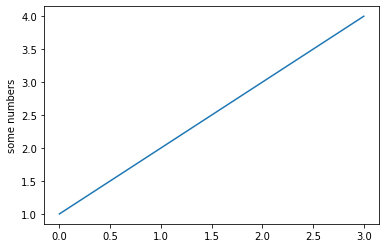

In [15]:
# Plot 함수의 리스트가 1개면 y 값으로 간주
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

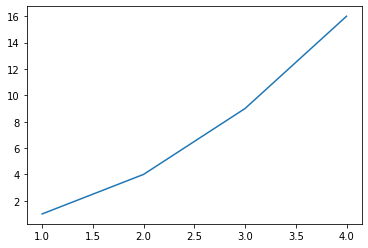

In [16]:
# Plot 함수의 리스트가 2개면 x값과 y값으로 간주
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

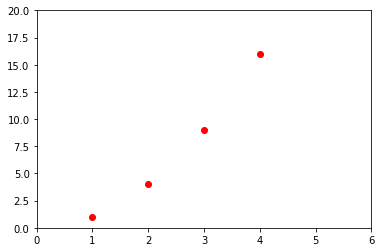

In [17]:
# 가로 세로 축 범위

plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') 
plt.axis([0, 6, 0, 20])
plt.show() 

### 스타일 추가

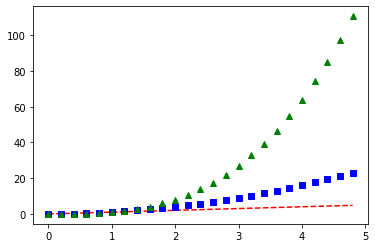

In [18]:
import numpy as np

# evenly sampled time at 200ms intervals 
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles 
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### 범주형 데이터

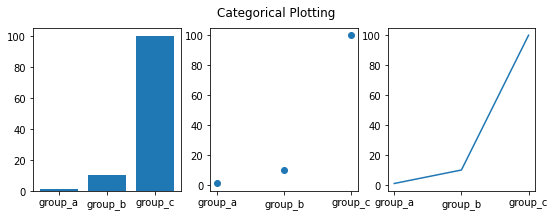

In [19]:
names = ['group_a', 'group_b', 'group_c'] 
values = [1, 10, 100] 

plt.figure(figsize=(9, 3)) 

plt.subplot(131) 
plt.bar(names, values) 
plt.subplot(132) 
plt.scatter(names, values) 
plt.subplot(133) 
plt.plot(names, values) 
plt.suptitle('Categorical Plotting')
plt.show() 

### 연속형 데이터

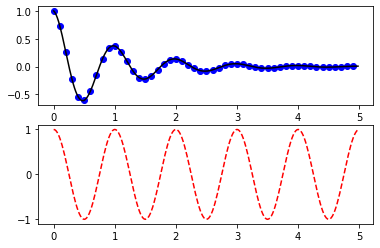

In [20]:
def f(t): 
    return np.exp(-t) * np.cos(2*np.pi*t) 

t1 = np.arange(0.0, 5.0, 0.1) 
t2 = np.arange(0.0, 5.0, 0.02) 

plt.figure() 
plt.subplot(211) 
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show() 

### 텍스트 처리

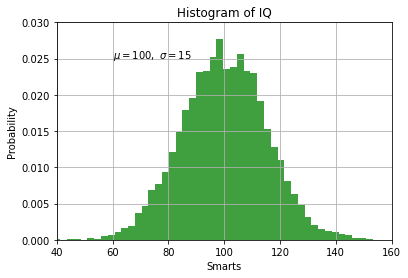

In [21]:
mu, sigma = 100, 15 
x = mu + sigma * np.random.randn(10000) 

# the histogram of the data 
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75) 

plt.xlabel('Smarts') 
plt.ylabel('Probability') 
plt.title('Histogram of IQ') 
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') 
plt.axis([40, 160, 0, 0.03]) 
plt.grid(True) 
plt.show() 

### 어노테이션

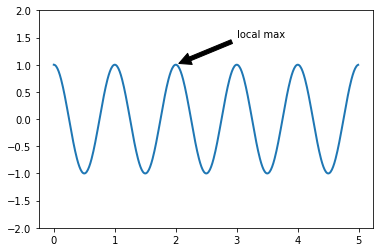

In [22]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

### 이미지

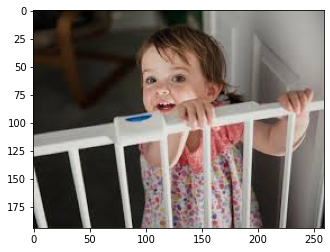

In [23]:
import matplotlib.image as mpimg

img = mpimg.imread(r"test_image.jpg") / 256  # rescale to between 0 and 1
plt.imshow(img)

## 데이터 시각화 예시

### 선 그래프

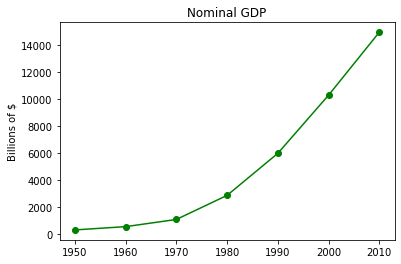

In [24]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

### 막대 그래프

#### 오스카 상 수상 횟수

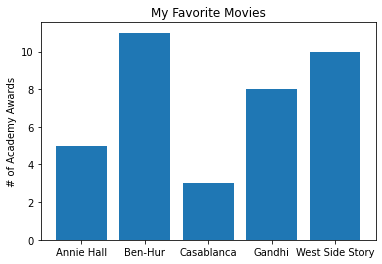

In [25]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()

#### 성적

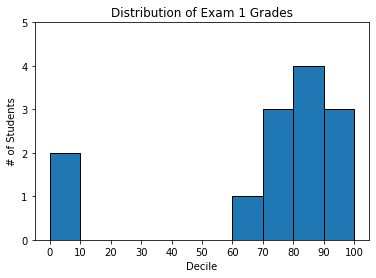

In [4]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                  # Give each bar a width of 8
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

#### 좌표 범위와 결과의 왜곡

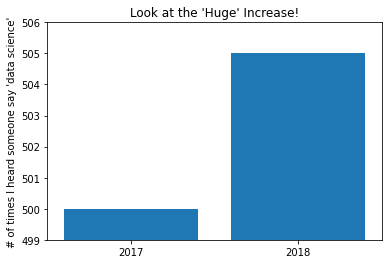

In [27]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

#### 범위를 재지정해서 결과가 큰 차이가 없음을 확인할 수 있도록 함

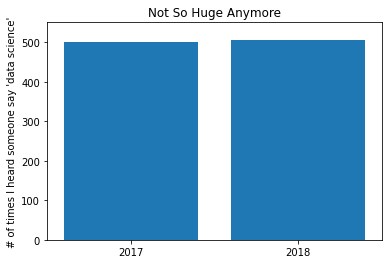

In [28]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.show()

### 분산과 편향 그래프

#### 여러 그래프 합쳐서 그리기

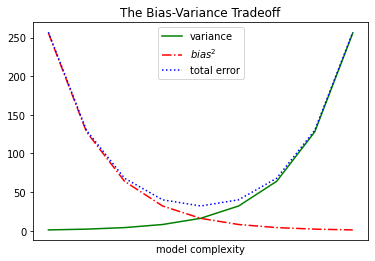

In [29]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='$bias^2$')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

### 산포도

#### 친구 수와 사이트 체류 시간

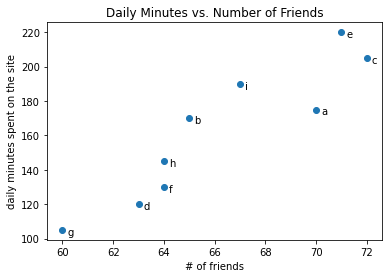

In [30]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

#### 좌표 범위와 결과의 왜곡

##### test_1의 편차가 test_2만큼 큰 것으로 표현이 됨

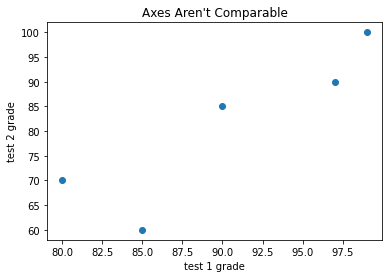

In [31]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

##### 두 축의 범위를 같게 만들어서 편차의 크기를 공정하게 비교하도록 함

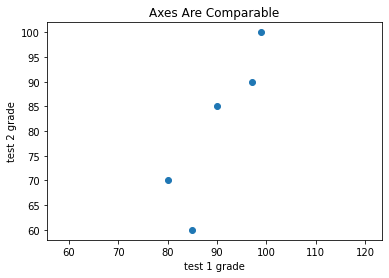

In [32]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()